In [1]:
!pip install ucimlrepo optuna

In [2]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,learning_curve, LearningCurveDisplay
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, classification_report,roc_auc_score, ConfusionMatrixDisplay,roc_curve, auc
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, label_binarize
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
import optuna
import numpy as np

In [3]:
optical_recognition_of_handwritten_digits= fetch_ucirepo(id=80)

X = optical_recognition_of_handwritten_digits.data.features
y = optical_recognition_of_handwritten_digits.data.targets

In [4]:
df= pd.concat([X, y], axis= 1)
target_label= df["class"].unique()
pd.set_option("display.max_columns", None)
df.head()

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,Attribute11,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16,Attribute17,Attribute18,Attribute19,Attribute20,Attribute21,Attribute22,Attribute23,Attribute24,Attribute25,Attribute26,Attribute27,Attribute28,Attribute29,Attribute30,Attribute31,Attribute32,Attribute33,Attribute34,Attribute35,Attribute36,Attribute37,Attribute38,Attribute39,Attribute40,Attribute41,Attribute42,Attribute43,Attribute44,Attribute45,Attribute46,Attribute47,Attribute48,Attribute49,Attribute50,Attribute51,Attribute52,Attribute53,Attribute54,Attribute55,Attribute56,Attribute57,Attribute58,Attribute59,Attribute60,Attribute61,Attribute62,Attribute63,Attribute64,class
0,0,1,6,15,12,1,0,0,0,7,16,6,6,10,0,0,0,8,16,2,0,11,2,0,0,5,16,3,0,5,7,0,0,7,13,3,0,8,7,0,0,4,12,0,1,13,5,0,0,0,14,9,15,9,0,0,0,0,6,14,7,1,0,0,0
1,0,0,10,16,6,0,0,0,0,7,16,8,16,5,0,0,0,11,16,0,6,14,3,0,0,12,12,0,0,11,11,0,0,12,12,0,0,8,12,0,0,7,15,1,0,13,11,0,0,0,16,8,10,15,3,0,0,0,10,16,15,3,0,0,0
2,0,0,8,15,16,13,0,0,0,1,11,9,11,16,1,0,0,0,0,0,7,14,0,0,0,0,3,4,14,12,2,0,0,1,16,16,16,16,10,0,0,2,12,16,10,0,0,0,0,0,2,16,4,0,0,0,0,0,9,14,0,0,0,0,7
3,0,0,0,3,11,16,0,0,0,0,5,16,11,13,7,0,0,3,15,8,1,15,6,0,0,11,16,16,16,16,10,0,0,1,4,4,13,10,2,0,0,0,0,0,15,4,0,0,0,0,0,3,16,0,0,0,0,0,0,1,15,2,0,0,4
4,0,0,5,14,4,0,0,0,0,0,13,8,0,0,0,0,0,3,14,4,0,0,0,0,0,6,16,14,9,2,0,0,0,4,16,3,4,11,2,0,0,0,14,3,0,4,11,0,0,0,10,8,4,11,12,0,0,0,4,12,14,7,0,0,6


In [5]:
def print_report(y_true, ypred, model_name):
  print('-'*30)
  print(f"Model: {model_name}")
  print('-'*30)
  print("Confusion Matrix: ")
  print(confusion_matrix(y_true, ypred))

  print('-'*30)
  print(f"Accuracy_score: {accuracy_score(y_true, ypred)}")
  print("-"*30)
  print(f"Recall_score: {recall_score(y_true, ypred, average='macro')}")
  print('-'* 30)
  print(f"Precision_score: {precision_score(y_true, ypred, average='macro')}")
  print('-'* 30)
  print(f"F1_score: {f1_score(y_true, ypred, average='macro')}")
  print('-'*30)
  print("Classification Report: ")
  print(classification_report(y_true, ypred))
  print('-'*30)


def plot_multiclass_roc(y_true, y_pred_proba, model_name):
    # Binarize the output
    n_classes= 10
    y_true_bin = label_binarize(y_true, classes=np.arange(n_classes))

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC curves
    plt.figure(figsize=(5, 4))
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend(loc="lower right")
    plt.show()

def plot_confusion_matrix(y_test, y_pred, labels):
  cm = confusion_matrix(y_test, y_pred)

  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels, )
  disp.plot(cmap=plt.cm.Blues)
  plt.title('Confusion Matrix')
  plt.show()

def plot_learning_curve(estimator, x, y):
  LearningCurveDisplay.from_estimator(
    estimator,
    x,
    y,
    n_jobs=-1
  )
  plt.show()

In [6]:
df.shape

(5620, 65)

In [7]:
df.isnull().sum().sum()

np.int64(0)

In [8]:
df.duplicated().sum().sum()

np.int64(0)

In [9]:
y= df["class"]
x= df.drop(["class"], axis=1)

In [10]:
scaler= StandardScaler()
x_scaled= scaler.fit_transform(x)

In [11]:
def get_accuracy_scores(x, y, split_list):
    accuracy_scores = {
        'Random Forest': [],
        'SVC': [],
        'MLP': []
    }
    for split in split_list:
        xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=split, random_state=42)

        # Random Forest
        rf = RandomForestClassifier()
        rf.fit(xtrain, ytrain)
        accuracy_scores['Random Forest'].append(accuracy_score(ytest, rf.predict(xtest)))

        # SVC
        svc = SVC()
        svc.fit(xtrain, ytrain)
        accuracy_scores['SVC'].append(accuracy_score(ytest, svc.predict(xtest)))

        # MLP
        mlp = MLPClassifier(max_iter=200, learning_rate="adaptive", momentum=0.9, early_stopping=True)
        mlp.fit(xtrain, ytrain)
        accuracy_scores['MLP'].append(accuracy_score(ytest, mlp.predict(xtest)))

    return accuracy_scores

def plot_accuracy_vs_test_size(accuracy_scores, split_list):
    plt.figure(figsize=(8, 5))
    for model_name, scores in accuracy_scores.items():
        plt.plot(split_list, scores, marker='o', label=model_name)

    plt.xlabel('Test Size')
    plt.ylabel('Accuracy Score')
    plt.title('Accuracy vs. Test Size for Different Models')
    plt.legend()
    plt.grid(True)
    plt.show()

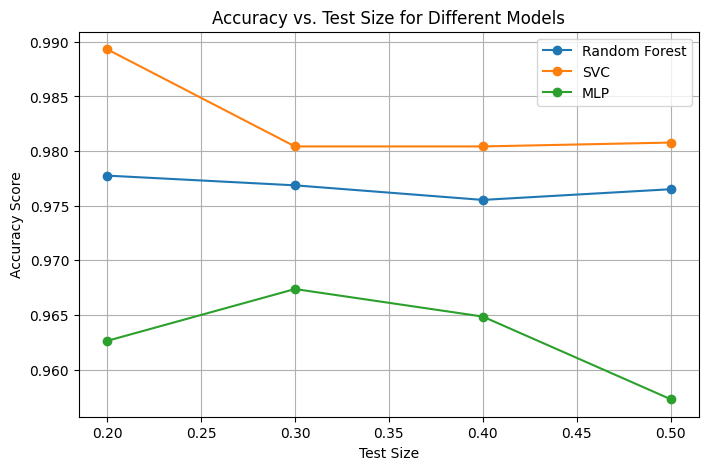

In [12]:
score_metrics= get_accuracy_scores(x_scaled, y, [0.2, 0.3, 0.4, 0.5])
plot_accuracy_vs_test_size(score_metrics, [0.2, 0.3, 0.4, 0.5])

In [13]:
def rf_train_and_plot(x, y, split):
  xtrain, xtest, ytrain, ytest= train_test_split(x, y, test_size= split, random_state= 42)
  rf= RandomForestClassifier()
  rf.fit(xtrain, ytrain)

  ypred_rf= rf.predict(xtest)
  ypred_rf_proba= rf.predict_proba(xtest)

  print_report(ytest, ypred_rf, "Random Forest Classifier")
  plot_confusion_matrix(ytest, ypred_rf, target_label)
  plot_multiclass_roc(ytest, ypred_rf_proba, "Random Forest Classifier")
  #plot_learning_curve(rf, xtrain, ytrain)

def svc_train_and_plot(x, y, split):
  xtrain, xtest, ytrain, ytest= train_test_split(x, y, test_size= split, random_state= 42)
  svc= SVC(probability= True)
  svc.fit(xtrain, ytrain)

  ypred_svc= svc.predict(xtest)
  ypred_svc_proba= svc.predict_proba(xtest)
  print_report(ytest, ypred_svc, "SVC Classifier")
  plot_confusion_matrix(ytest, ypred_svc, target_label)
  plot_multiclass_roc(ytest, ypred_svc_proba, "SVC Classifier")
  #plot_learning_curve(svc, xtrain, ytrain)

def mlp_train_and_plot(x, y, split):
  xtrain, xtest, ytrain, ytest= train_test_split(x, y, test_size= split, random_state= 42)
  mlp= MLPClassifier(max_iter=200, learning_rate= "adaptive", momentum= 0.9, early_stopping=True)
  mlp.fit(xtrain, ytrain)

  ypred_mlp= mlp.predict(xtest)
  ypred_mlp_proba= mlp.predict_proba(xtest)
  print_report(ytest, ypred_mlp, "MLP Classifier")
  plot_confusion_matrix(ytest, ypred_mlp, target_label)
  plot_multiclass_roc(ytest, ypred_mlp_proba, "MLP Classifier")
  plot_learning_curve(mlp, xtrain, ytrain)

  # plotting the loss curve
  plt.plot(mlp.loss_curve_)
  plt.title("MLP Classifier Loss Curve")
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.show()

------------------------------
Model: Random Forest Classifier
------------------------------
Confusion Matrix: 
[[107   0   0   0   1   0   0   0   0   0]
 [  0 101   0   0   0   0   0   1   0   0]
 [  0   0 106   0   0   0   0   0   0   1]
 [  0   0   1 113   0   1   0   0   2   1]
 [  0   0   0   0 115   0   2   0   0   0]
 [  0   1   0   0   1  93   0   0   2   0]
 [  1   2   0   0   0   0 120   0   0   0]
 [  0   0   0   0   0   0   0 124   0   0]
 [  0   2   0   0   0   1   0   0 102   0]
 [  0   2   0   1   1   0   0   0   3 116]]
------------------------------
Accuracy_score: 0.9759786476868327
------------------------------
Recall_score: 0.976101477134802
------------------------------
Precision_score: 0.9755769062664772
------------------------------
F1_score: 0.975641344571758
------------------------------
Classification Report: 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       108
           1       0.94      0.99    

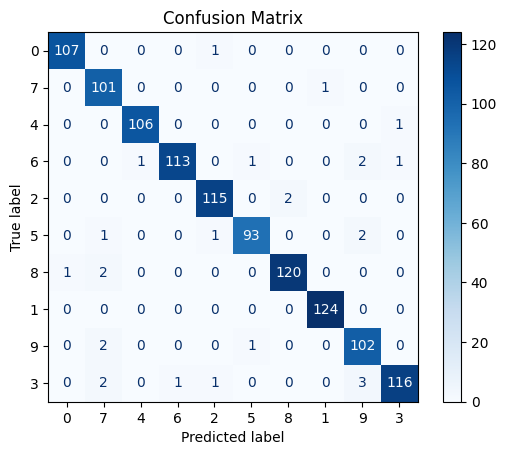

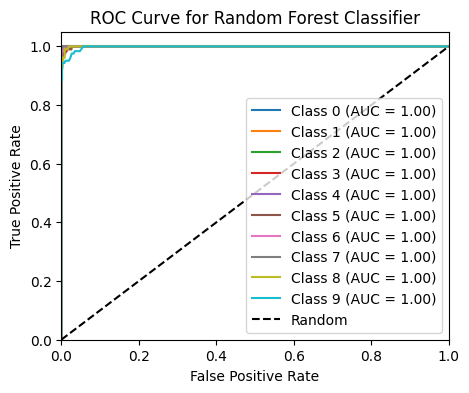

In [33]:
rf_train_and_plot(x_scaled, y, 0.2)

------------------------------
Model: SVC Classifier
------------------------------
Confusion Matrix: 
[[108   0   0   0   0   0   0   0   0   0]
 [  0 102   0   0   0   0   0   0   0   0]
 [  0   0 106   0   1   0   0   0   0   0]
 [  0   0   0 115   0   3   0   0   0   0]
 [  0   0   0   0 116   0   1   0   0   0]
 [  0   0   0   0   0  97   0   0   0   0]
 [  0   1   0   0   0   0 122   0   0   0]
 [  0   0   0   0   0   0   0 124   0   0]
 [  0   0   0   0   2   0   0   0 103   0]
 [  0   1   0   2   0   0   0   0   1 119]]
------------------------------
Accuracy_score: 0.9893238434163701
------------------------------
Recall_score: 0.9896985442695223
------------------------------
Precision_score: 0.9890719663725402
------------------------------
F1_score: 0.9893129177865886
------------------------------
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       108
           1       0.98      1.00      0.99  

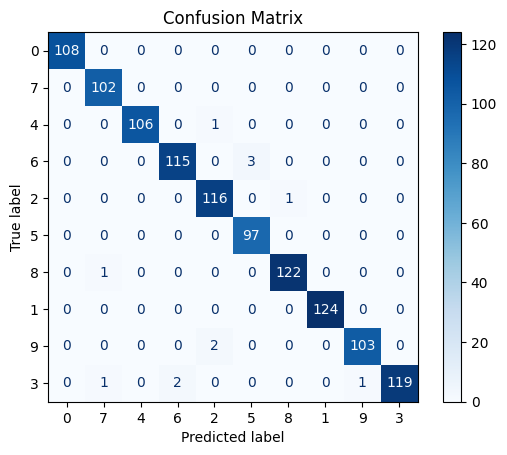

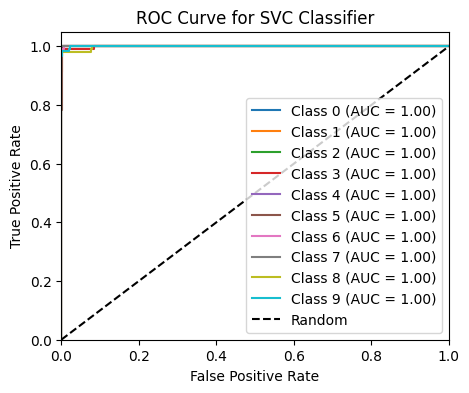

In [15]:
svc_train_and_plot(x_scaled, y, 0.2)

------------------------------
Model: MLP Classifier
------------------------------
Confusion Matrix: 
[[169   0   1   0   0   0   0   0   0   0]
 [  0 173   0   0   0   0   0   0   0   0]
 [  0   0 150   0   0   0   0   0   3   1]
 [  0   0   1 165   0   5   0   0   1   1]
 [  0   1   0   0 177   0   2   0   1   1]
 [  0   0   0   1   1 150   0   0   0   1]
 [  0   1   0   0   1   0 166   0   0   0]
 [  0   0   0   2   0   0   0 184   0   0]
 [  0   4   0   0   3   0   0   0 145   1]
 [  0   1   1   2   1   1   0   2   4 162]]
------------------------------
Accuracy_score: 0.9733096085409253
------------------------------
Recall_score: 0.973090992689101
------------------------------
Precision_score: 0.9729803951281693
------------------------------
F1_score: 0.9729369326358548
------------------------------
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       170
           1       0.96      1.00      0.98   

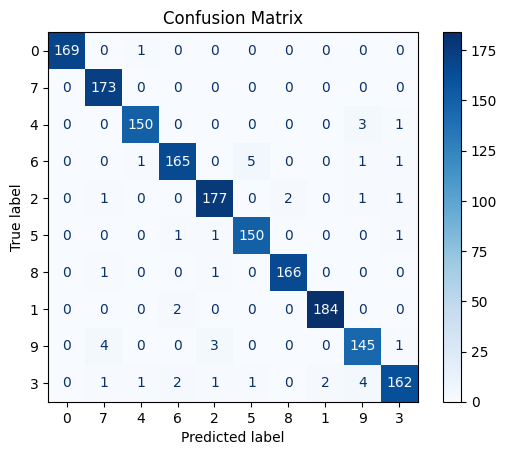

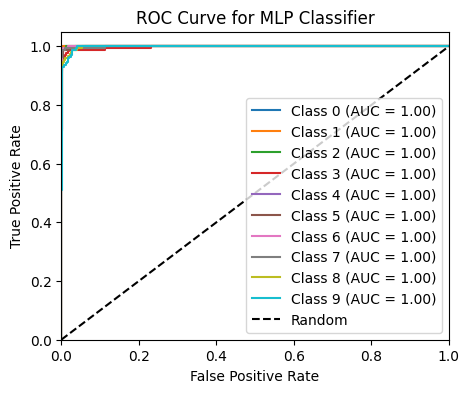

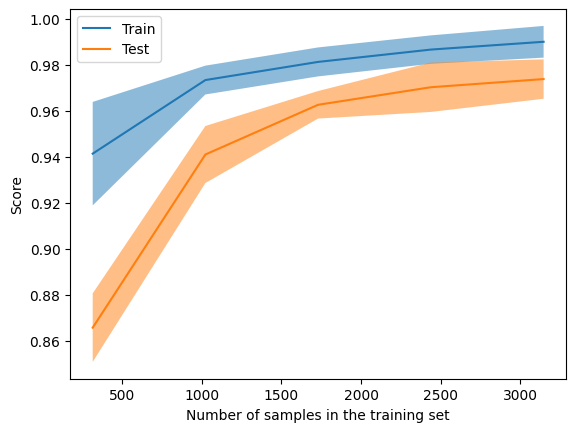

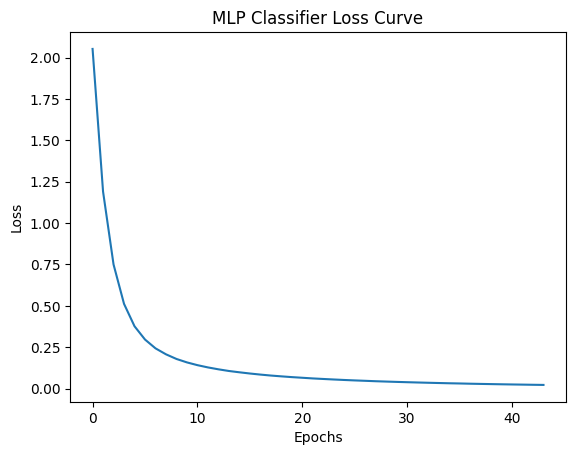

In [16]:
mlp_train_and_plot(x_scaled, y, 0.3)

In [17]:
class OputnaTuningRF:
  def __init__(self, x_train, y_train, x_test, y_test):
    self.x_train= x_train
    self.y_train= y_train
    self.x_test= x_test
    self.y_test= y_test

  def objective(self, trial):
    n_estimators= trial.suggest_int("n_estimators", 100, 500)
    max_depth= trial.suggest_int("max_depth", 1, 10)
    criterion= trial.suggest_categorical("criterion", ["gini", "entropy"])

    model= RandomForestClassifier(
        n_estimators= n_estimators,
        max_depth= max_depth,
        criterion= criterion,
        n_jobs= -1
    )

    model.fit(self.x_train, self.y_train)
    ypred= model.predict(self.x_test)
    score= accuracy_score(self.y_test, ypred)
    return score

  def optimize(self):
    study= optuna.create_study(direction= "maximize")
    study.optimize(self.objective, n_trials= 25)
    return study.best_params, study.best_value

class OputnaTuningMLP:
  def __init__(self, x_train, y_train, x_test, y_test):
    self.x_train= x_train
    self.y_train= y_train
    self.x_test= x_test
    self.y_test= y_test

  def objective(self, trial):
    max_iter= trial.suggest_int("max_iter", 200, 500)
    learning_rate= trial.suggest_categorical("learning_rate", ["constant", "adaptive"])
    momentum= trial.suggest_float("momentum", 0.0, 1.0)
    learning_rate_init= trial.suggest_float("learning_rate_init", 0.00001, 0.01)
    hidden_layer_sizes= trial.suggest_int("hidden_layer_sizes", 10, 100)

    model= MLPClassifier(
        max_iter= max_iter,
        learning_rate= learning_rate,
        momentum= momentum,
        learning_rate_init= learning_rate_init,
        hidden_layer_sizes= hidden_layer_sizes
    )

    model.fit(self.x_train, self.y_train)
    ypred= model.predict(self.x_test)
    score= accuracy_score(self.y_test, ypred)
    return score


  def optimize(self):
    study= optuna.create_study(direction= "maximize")
    study.optimize(self.objective, n_trials= 25)
    return study.best_params, study.best_value

class OptunaTuningSVM:
  def __init__(self, x_train, y_train, x_test, y_test):
    self.x_train= x_train
    self.y_train= y_train
    self.x_test= x_test
    self.y_test= y_test

  def objective(self, trial):
    kernel= trial.suggest_categorical("kernel", ["linear", "poly", "rbf", "sigmoid"])
    C= trial.suggest_float("C", 0.1, 10)

    model= SVC(
        kernel= kernel,
        C= C
    )
    model.fit(self.x_train, self.y_train)
    ypred= model.predict(self.x_test)
    score= accuracy_score(self.y_test, ypred)
    return score

  def optimize(self):
    study= optuna.create_study(direction= "maximize")
    study.optimize(self.objective, n_trials= 25)
    return study.best_params, study.best_value

In [18]:
# apply pca and then train model
pca= PCA(n_components= 0.95)
x_pca= pca.fit_transform(x_scaled)

In [19]:
split_list= [0.2, 0.3, 0.4, 0.5]

rf_params= []
for split in split_list:
  pca_xtrain, pca_xtest, pca_ytrain, pca_ytest= train_test_split(x_pca, y, test_size= split, random_state= 42)

  rf_optuna= OputnaTuningRF(pca_xtrain, pca_ytrain, pca_xtest, pca_ytest)
  best_params_rf, best_score_rf= rf_optuna.optimize()

  rf_params.append(
      {f"rf_{split}": [
          best_params_rf,
          best_score_rf
      ]}
  )

svm_params= []
for split in split_list:
  pca_xtrain, pca_xtest, pca_ytrain, pca_ytest= train_test_split(x_pca, y, test_size= split, random_state= 42)

  svm_optuna= OptunaTuningSVM(pca_xtrain, pca_ytrain, pca_xtest, pca_ytest)
  best_params_svm, best_score_svm= svm_optuna.optimize()
  svm_params.append(
      {f"svm_{split}": [
          best_params_svm,
          best_score_svm
      ]}
  )

mlp_params= []
for split in split_list:
  pca_xtrain, pca_xtest, pca_ytrain, pca_ytest= train_test_split(x_pca, y, test_size= split, random_state= 42)

  mlp_optuna= OputnaTuningMLP(pca_xtrain, pca_ytrain, pca_xtest, pca_ytest)
  best_params_mlp, best_score_mlp= mlp_optuna.optimize()
  mlp_params.append(
      {f"mlp_{split}": [
          best_params_mlp,
          best_score_mlp
      ]}
  )

[I 2025-09-03 07:43:17,587] A new study created in memory with name: no-name-783b9110-1105-4403-8561-ae96c9a8e915
[I 2025-09-03 07:43:24,418] Trial 0 finished with value: 0.951067615658363 and parameters: {'n_estimators': 183, 'max_depth': 7, 'criterion': 'entropy'}. Best is trial 0 with value: 0.951067615658363.
[I 2025-09-03 07:43:29,119] Trial 1 finished with value: 0.9145907473309609 and parameters: {'n_estimators': 235, 'max_depth': 5, 'criterion': 'gini'}. Best is trial 0 with value: 0.951067615658363.
[I 2025-09-03 07:43:30,049] Trial 2 finished with value: 0.7348754448398577 and parameters: {'n_estimators': 105, 'max_depth': 1, 'criterion': 'entropy'}. Best is trial 0 with value: 0.951067615658363.
[I 2025-09-03 07:43:35,299] Trial 3 finished with value: 0.947508896797153 and parameters: {'n_estimators': 143, 'max_depth': 7, 'criterion': 'entropy'}. Best is trial 0 with value: 0.951067615658363.
[I 2025-09-03 07:43:40,131] Trial 4 finished with value: 0.8336298932384342 and par

In [20]:
for item in rf_params:
  print(item)

{'rf_0.2': [{'n_estimators': 490, 'max_depth': 10, 'criterion': 'entropy'}, 0.9661921708185054]}
{'rf_0.3': [{'n_estimators': 133, 'max_depth': 10, 'criterion': 'entropy'}, 0.961447212336892]}
{'rf_0.4': [{'n_estimators': 466, 'max_depth': 10, 'criterion': 'entropy'}, 0.9635231316725978]}
{'rf_0.5': [{'n_estimators': 399, 'max_depth': 10, 'criterion': 'entropy'}, 0.9587188612099644]}


In [21]:
for item in svm_params:
  print(item)

{'svm_0.2': [{'kernel': 'poly', 'C': 8.875424377411797}, 0.9902135231316725]}
{'svm_0.3': [{'kernel': 'poly', 'C': 7.8450314146772895}, 0.9851720047449585]}
{'svm_0.4': [{'kernel': 'poly', 'C': 8.374551579953614}, 0.9862099644128114]}
{'svm_0.5': [{'kernel': 'rbf', 'C': 5.910135769549915}, 0.9839857651245552]}


In [22]:
for item in mlp_params:
  print(item)

{'mlp_0.2': [{'max_iter': 203, 'learning_rate': 'constant', 'momentum': 0.9509985364674889, 'learning_rate_init': 0.00217039503763109, 'hidden_layer_sizes': 62}, 0.9866548042704626]}
{'mlp_0.3': [{'max_iter': 254, 'learning_rate': 'adaptive', 'momentum': 0.5066334501712941, 'learning_rate_init': 0.009856672460742861, 'hidden_layer_sizes': 68}, 0.9810201660735468]}
{'mlp_0.4': [{'max_iter': 300, 'learning_rate': 'adaptive', 'momentum': 0.020707638816071794, 'learning_rate_init': 0.006504839193321596, 'hidden_layer_sizes': 68}, 0.9817615658362989]}
{'mlp_0.5': [{'max_iter': 255, 'learning_rate': 'constant', 'momentum': 0.28613789003076223, 'learning_rate_init': 0.007194824984307004, 'hidden_layer_sizes': 77}, 0.9786476868327402]}


In [23]:
def get_best_params(param_list):

  score=0
  params=None
  t_size= None
  for item in param_list:
    for key, value in item.items():
      if value[1] > score:
        score= value[1]
        params= value[0]
        t_size= float(key.split("_")[1])

  return [t_size, params]

In [24]:
rf_parameters= get_best_params(rf_params)
svm_parameters= get_best_params(svm_params)
mlp_parameters= get_best_params(mlp_params)

In [25]:
def show_best_params(params, model):
  print(f"Model: {model}")
  print(f"Test Size: {params[0]}")
  print("-"*30)
  print("Best Parameters: ")
  for key, value in params[1].items():
    print(f"{key}: {value}")

In [26]:
show_best_params(rf_parameters, "Random Forest Classifier")

Model: Random Forest Classifier
Test Size: 0.2
------------------------------
Best Parameters: 
n_estimators: 490
max_depth: 10
criterion: entropy


In [27]:
show_best_params(svm_parameters, "SVC Classifier")

Model: SVC Classifier
Test Size: 0.2
------------------------------
Best Parameters: 
kernel: poly
C: 8.875424377411797


In [28]:
show_best_params(mlp_parameters, "MLP Classifier")

Model: MLP Classifier
Test Size: 0.2
------------------------------
Best Parameters: 
max_iter: 203
learning_rate: constant
momentum: 0.9509985364674889
learning_rate_init: 0.00217039503763109
hidden_layer_sizes: 62


In [29]:
def pca_rf_train_and_plot(x, y, params):
  xtrain, xtest, ytrain, ytest= train_test_split(x, y, test_size= params[0], random_state= 42)

  rf= RandomForestClassifier(
      n_estimators= params[1]["n_estimators"],
      max_depth= params[1]["max_depth"],
      criterion= params[1]["criterion"],
      n_jobs= -1
  )

  rf.fit(xtrain, ytrain)
  ypred_rf= rf.predict(xtest)
  ypred_rf_proba= rf.predict_proba(xtest)
  print_report(ytest, ypred_rf, f"Random Forest Classifier with test_size: {params[0]}")
  #plot_learning_curve(rf, xtrain, ytrain)
  plot_confusion_matrix(ytest, ypred_rf, target_label)
  plot_multiclass_roc(ytest, ypred_rf_proba, "Random Forest Classifier")


def pca_svc_train_and_plot(x, y, params):
  xtrain, xtest, ytrain, ytest= train_test_split(x, y, test_size= params[0], random_state=42)

  svc= SVC(
      kernel= params[1]["kernel"],
      C= params[1]["C"],
      probability= True
  )

  svc.fit(xtrain, ytrain)
  ypred_svc= svc.predict(xtest)
  ypred_svc_proba= svc.predict_proba(xtest)
  print_report(ytest, ypred_svc, f"SVC Classifier with test_size: {params[0]}")
  #plot_learning_curve(svc, xtrain, ytrain)
  plot_confusion_matrix(ytest, ypred_svc, target_label)
  plot_multiclass_roc(ytest, ypred_svc_proba, "SVC Classifier")


def pca_mlp_train_and_plot(x, y, params):
  xtrain, xtest, ytrain, ytest= train_test_split(x, y, test_size= params[0], random_state= 42)

  mlp= MLPClassifier(
      max_iter= params[1]["max_iter"],
      learning_rate= params[1]["learning_rate"],
      momentum= params[1]["momentum"],
      learning_rate_init= params[1]["learning_rate_init"],
      hidden_layer_sizes= params[1]["hidden_layer_sizes"],
      early_stopping=True
  )

  mlp.fit(xtrain, ytrain)

  ypred_mlp= mlp.predict(xtest)
  ypred_mlp_proba= mlp.predict_proba(xtest)
  print_report(ytest, ypred_mlp, f"MLP Classifier with test_size: {params[0]}")
  plot_learning_curve(mlp, xtrain, ytrain)
  plot_confusion_matrix(ytest, ypred_mlp, target_label)
  plot_multiclass_roc(ytest, ypred_mlp_proba, "MLP Classifier")
  plt.plot(mlp.loss_curve_)
  plt.title("MLP Classifier Loss Curve")
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.show()

------------------------------
Model: Random Forest Classifier with test_size: 0.2
------------------------------
Confusion Matrix: 
[[107   0   0   0   1   0   0   0   0   0]
 [  0 102   0   0   0   0   0   0   0   0]
 [  0   0 106   0   0   0   0   0   0   1]
 [  0   0   0 114   0   2   0   0   1   1]
 [  0   0   0   0 115   0   2   0   0   0]
 [  0   1   0   0   1  92   0   0   3   0]
 [  1   1   0   0   0   0 121   0   0   0]
 [  0   0   0   1   0   0   0 123   0   0]
 [  0   2   0   0   0   0   0   0 103   0]
 [  0   2   0   2   0   0   0   1   2 116]]
------------------------------
Accuracy_score: 0.9777580071174378
------------------------------
Recall_score: 0.9778573365532909
------------------------------
Precision_score: 0.9774853843872797
------------------------------
F1_score: 0.9774891756051304
------------------------------
Classification Report: 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       108
           1   

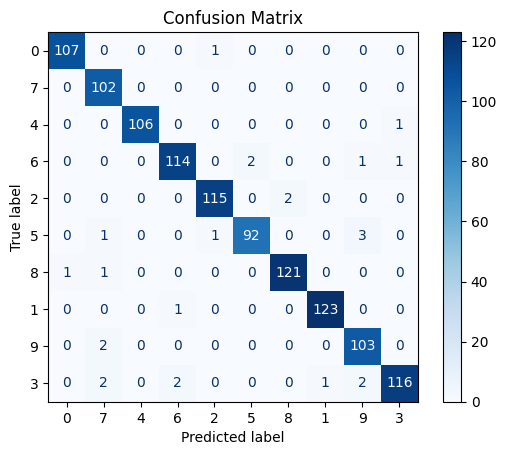

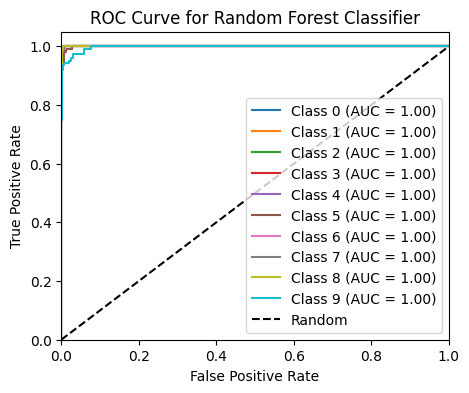

In [30]:
pca_rf_train_and_plot(x_scaled, y, rf_parameters)

------------------------------
Model: SVC Classifier with test_size: 0.2
------------------------------
Confusion Matrix: 
[[108   0   0   0   0   0   0   0   0   0]
 [  0 102   0   0   0   0   0   0   0   0]
 [  0   0 106   0   0   0   0   0   0   1]
 [  0   0   0 115   0   2   0   0   1   0]
 [  0   0   0   0 116   0   1   0   0   0]
 [  0   0   0   0   0  97   0   0   0   0]
 [  0   1   0   0   0   0 122   0   0   0]
 [  0   0   0   0   0   0   0 123   0   1]
 [  0   0   0   0   0   0   0   0 105   0]
 [  0   0   0   2   0   0   0   0   3 118]]
------------------------------
Accuracy_score: 0.9893238434163701
------------------------------
Recall_score: 0.9899838464312998
------------------------------
Precision_score: 0.9891501229165982
------------------------------
F1_score: 0.9894977755223915
------------------------------
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       108
           1       0.99  

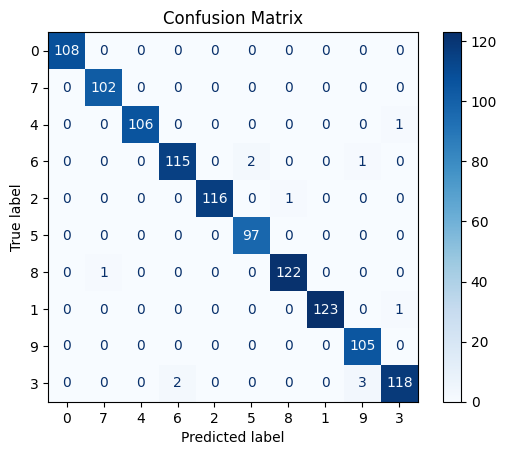

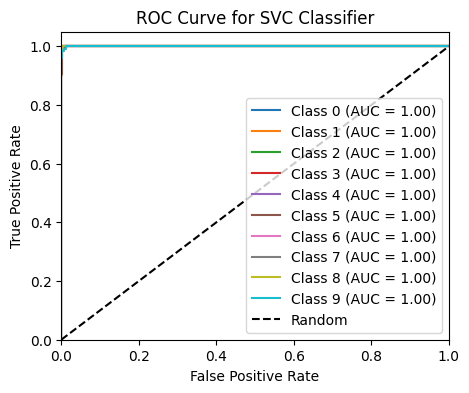

In [31]:
pca_svc_train_and_plot(x_scaled, y, svm_parameters)

------------------------------
Model: MLP Classifier with test_size: 0.2
------------------------------
Confusion Matrix: 
[[108   0   0   0   0   0   0   0   0   0]
 [  0 100   0   0   0   0   0   1   1   0]
 [  0   0 106   0   0   0   0   0   0   1]
 [  0   0   1 113   0   3   0   0   0   1]
 [  0   0   0   0 114   0   1   0   1   1]
 [  0   0   0   1   1  94   0   0   0   1]
 [  0   2   0   0   1   0 120   0   0   0]
 [  0   0   1   0   0   0   0 123   0   0]
 [  0   1   0   0   2   0   0   0 102   0]
 [  0   1   1   1   1   1   0   0   3 115]]
------------------------------
Accuracy_score: 0.9741992882562278
------------------------------
Recall_score: 0.9746037781412313
------------------------------
Precision_score: 0.9737119691877801
------------------------------
F1_score: 0.974073602378404
------------------------------
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       108
           1       0.96   

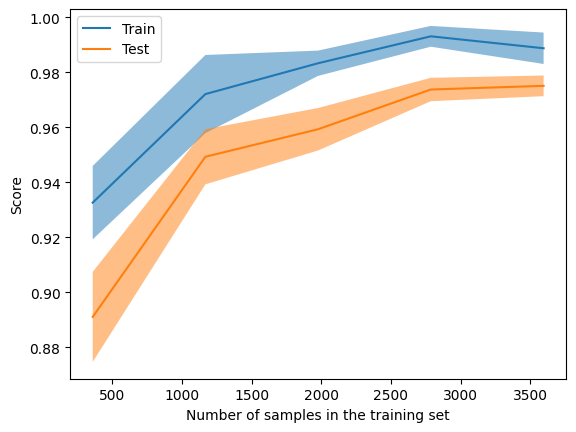

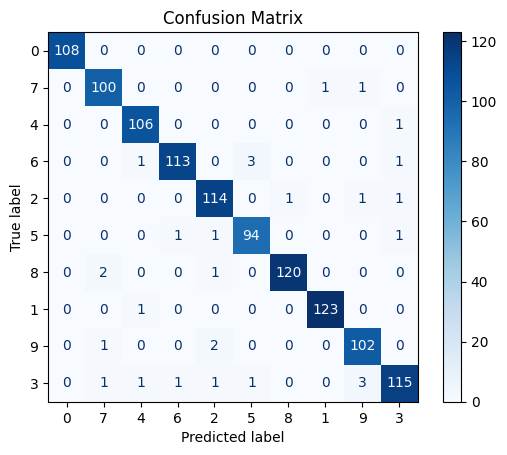

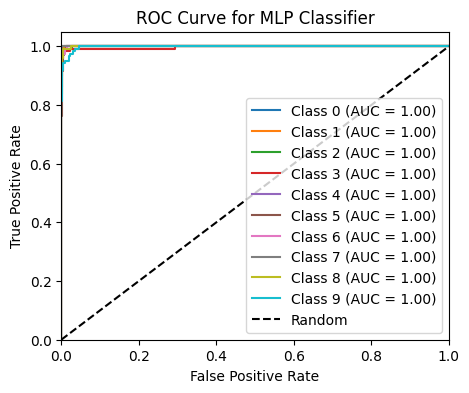

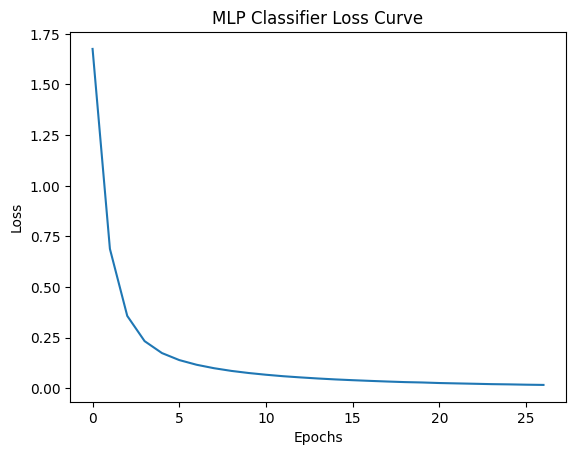

In [32]:
pca_mlp_train_and_plot(x_scaled, y, mlp_parameters)